In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter("ignore",category=FutureWarning)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [2]:
data=pd.read_csv(r"C:\Users\user\Downloads\intermittent-renewables-production-france.csv")
data.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Hour  59806 non-null  object 
 1   Date           59806 non-null  object 
 2   StartHour      59806 non-null  object 
 3   EndHour        59806 non-null  object 
 4   Source         59806 non-null  object 
 5   Production     59804 non-null  float64
 6   dayOfYear      59806 non-null  int64  
 7   dayName        59806 non-null  object 
 8   monthName      59806 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB


In [4]:
data.isnull().sum()

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       2
dayOfYear        0
dayName          0
monthName        0
dtype: int64

In [5]:
null=data[data.isnull().any(axis=1)]
null

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
36164,2022-03-27 03:00:00+02:00,2022-03-27,02:00:00,03:00:00,Solar,NaN,86,Sunday,March
39321,2022-03-27 03:00:00+02:00,2022-03-27,02:00:00,03:00:00,Wind,NaN,86,Sunday,March


In [6]:
data.dropna(inplace=True)

In [7]:
data.dtypes

Date and Hour     object
Date              object
StartHour         object
EndHour           object
Source            object
Production       float64
dayOfYear          int64
dayName           object
monthName         object
dtype: object

In [8]:
data.columns

Index(['Date and Hour', 'Date', 'StartHour', 'EndHour', 'Source', 'Production', 'dayOfYear', 'dayName', 'monthName'], dtype='object')

In [9]:
data.drop("Date and Hour",axis=1,inplace=True)
data["StartHour"]=data["StartHour"].str.replace(":00:00","")
data["EndHour"]=data["EndHour"].str.replace(":00:00","")
data["StartHour"]=data["StartHour"].astype(int)
data["EndHour"]=data["EndHour"].astype(int)

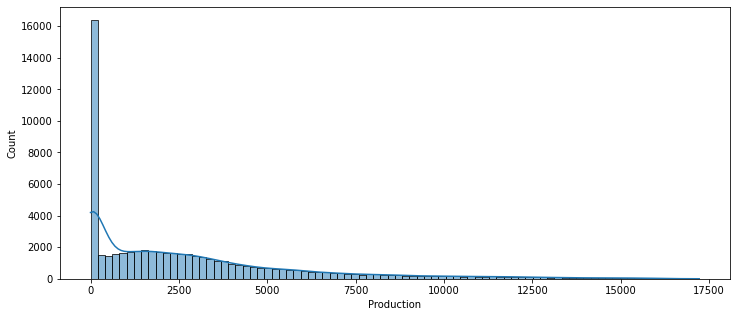

In [10]:
plt.figure(figsize=(12,5))
sns.histplot(data["Production"],kde=True)
plt.show()

In [11]:
data

,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22,20,21,Solar,244.0,204,Wednesday,July
1,2020-07-23,7,8,Solar,223.0,205,Thursday,July
2,2020-07-23,16,17,Solar,2517.0,205,Thursday,July
3,2020-07-23,19,20,Solar,658.0,205,Thursday,July
4,2020-07-23,23,24,Solar,0.0,205,Thursday,July
...,...,...,...,...,...,...,...,...
59801,2023-06-30,6,7,Solar,55.0,181,Friday,June
59802,2023-06-30,13,14,Solar,4554.0,181,Friday,June
59803,2023-06-30,14,15,Solar,4589.0,181,Friday,June
59804,2023-06-30,16,17,Solar,4173.0,181,Friday,June


In [12]:
#Mean of production by day
mp=data.groupby(by="dayName",as_index=False)["Production"].mean()
mp.sort_values(by="Production",ascending=False)

,dayName,Production
1,Monday,2837.673258
3,Sunday,2837.066062
5,Tuesday,2813.556968
0,Friday,2807.817621
2,Saturday,2794.446395
4,Thursday,2753.287826
6,Wednesday,2707.425628


In [13]:
data["Source"].value_counts()

Wind     29903
Solar    29901
Name: Source, dtype: int64

In [14]:
mps=data[data["Source"]=="Solar"].groupby(by="dayName",as_index=False)["Production"].mean()
mps_sorted=mps.sort_values(by="Production",ascending=False)
mps_sorted

,dayName,Production
2,Saturday,1091.632022
1,Monday,1079.059087
6,Wednesday,1074.894553
5,Tuesday,1071.410311
3,Sunday,1065.974558
0,Friday,1054.762104
4,Thursday,1044.539339


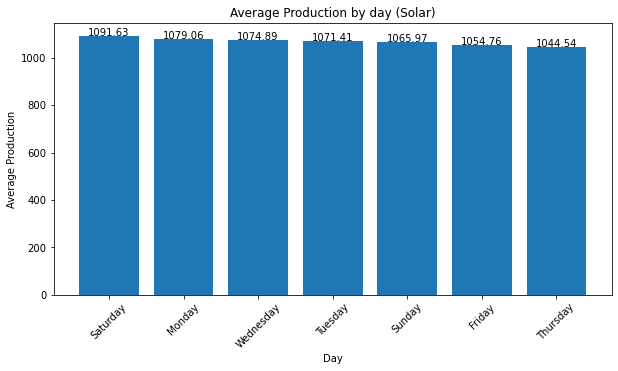

In [15]:
y=mps_sorted["Production"]
x=mps_sorted["dayName"]
plt.figure(figsize=(10,5))
colors=sns.color_palette("Blues",len(x))
plt.bar(x,y)
plt.xlabel("Day")
plt.ylabel("Average Production")
plt.title("Average Production by day (Solar)")
plt.xticks(rotation=45)
for index, value in enumerate(y):
    plt.text(index,value,str(round(value,2)),ha='center',va='baseline')
plt.show()

In [16]:
mpw=data[data["Source"]=="Wind"].groupby(by="dayName",as_index=False)["Production"].mean()
mpw_sorted=mpw.sort_values(by="Production",ascending=False)

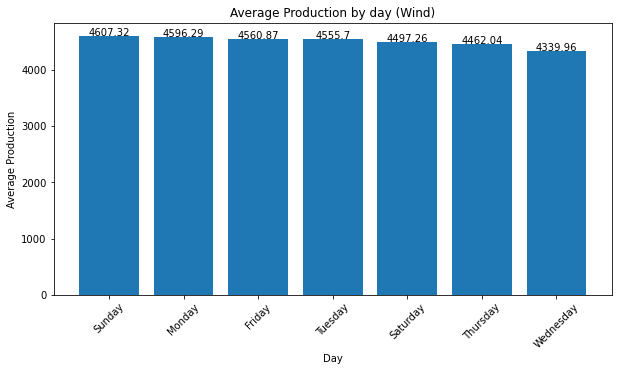

In [17]:
y=mpw_sorted["Production"]
x=mpw_sorted["dayName"]
plt.figure(figsize=(10,5))
colors=sns.color_palette("Blues",7)
plt.bar(x,y)
plt.xlabel("Day")
plt.ylabel("Average Production")
plt.title("Average Production by day (Wind)")
plt.xticks(rotation=45)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 2)), ha='center', va='baseline')
plt.show()


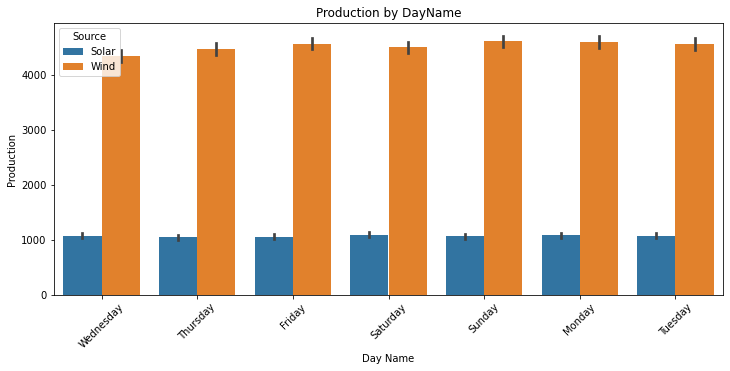

In [18]:
plt.figure(figsize=(12,5))
sns.barplot(data=data,x="dayName",y="Production",hue="Source")
plt.title("Production by DayName")
plt.xlabel("Day Name")
plt.xticks(rotation=45)
plt.show()

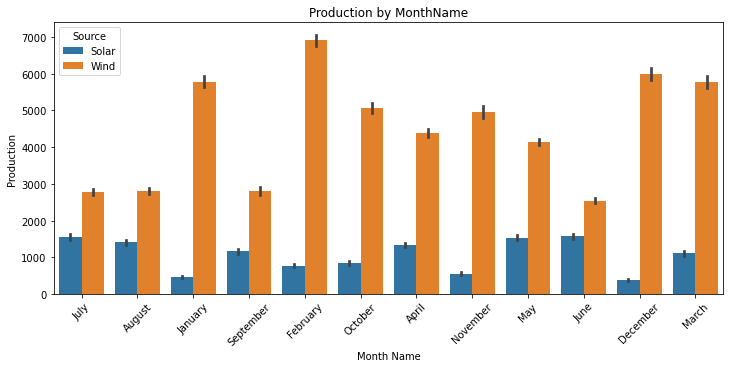

In [19]:
plt.figure(figsize=(12,5))
sns.barplot(data=data,x="monthName",y="Production",hue="Source")
plt.title("Production by MonthName")
plt.xlabel("Month Name")
plt.xticks(rotation=45)
plt.show()

In [20]:
data["Total_time"]=data["EndHour"]-data["StartHour"]
data.drop(["Date"],axis=1,inplace=True)
data.drop(["StartHour","EndHour"],axis=1,inplace=True)

In [21]:
list=["Source","dayName","monthName"]
for i in list:
    data[i]=LabelEncoder().fit_transform(data[i])

In [22]:
data.head()

,Source,Production,dayOfYear,dayName,monthName,Total_time
0,0,244.0,204,6,5,1
1,0,223.0,205,4,5,1
2,0,2517.0,205,4,5,1
3,0,658.0,205,4,5,1
4,0,0.0,205,4,5,1


In [23]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [24]:
X=data.drop(["monthName"],axis=1)
y=data["monthName"]

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("X-Train :",X_train.shape)
print("X-Test :",X_test.shape)
print("Y-Train :",y_test.shape)
print("Y-Test :",y_test.shape)

X-Train : (47843, 5)
X-Test : (11961, 5)
Y-Train : (11961,)
Y-Test : (11961,)


In [35]:
classification = {
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'K-nearest Neighbors' : KNeighborsClassifier()
}
results=pd.DataFrame(columns=["accuracy"])
for method,func in classification.items():
    func.fit(X_train,y_train)
    y_pred = func.predict(X_test)
    results.loc[method]= [accuracy_score(y_test,y_pred)]
results

,accuracy
Random Forest,0.999666
Gradient Boosting,1.000000
Decision Tree,1.000000
K-nearest Neighbors,0.911880
